In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('placement.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [3]:
df.sample(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2129,19,Male,Computer Science,0,9,0,1,1
894,22,Male,Information Technology,0,7,0,0,1
2180,20,Male,Information Technology,3,9,1,0,1
2499,22,Male,Computer Science,2,6,0,0,1
1030,21,Male,Information Technology,2,7,0,0,1


In [4]:
df.shape

(2966, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [6]:
df.rename(columns={'HistoryOfBacklogs':'Backlogs'},inplace=True)
df.sample(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,Backlogs,PlacedOrNot
1032,21,Male,Electrical,1,6,0,0,0
2468,20,Male,Electrical,0,8,0,1,1
795,22,Female,Electrical,0,8,0,0,1
2842,22,Male,Information Technology,0,7,0,0,0
2800,23,Male,Electronics And Communication,0,8,0,0,1


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
df['Gender']=encoder.fit_transform(df['Gender'])

In [9]:
#df['Stream']=encoder.fit_transform(df['Stream'])

In [10]:
df=df.join(pd.get_dummies(df.Stream))

In [11]:
df['Civil']=df['Civil'].astype(int)

In [12]:
df['Computer Science']=df['Computer Science'].astype(int)

In [13]:
df['Electrical']=df['Electrical'].astype(int)
df['Electronics And Communication']=df['Electronics And Communication'].astype(int)
df['Information Technology']=df['Information Technology'].astype(int)
df['Mechanical']=df['Mechanical'].astype(int)
df.drop(columns=['Stream'],inplace=True)

In [14]:
df.sample(5)

,Age,Gender,Internships,CGPA,Hostel,Backlogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
1624,22,1,1,8,0,0,1,0,1,0,0,0,0
147,23,1,0,5,1,1,0,0,0,0,0,0,1
22,22,1,0,7,0,0,0,1,0,0,0,0,0
1898,23,1,2,6,0,0,1,0,0,0,0,1,0
921,21,1,0,8,0,0,1,1,0,0,0,0,0


In [15]:
df.head()

,Age,Gender,Internships,CGPA,Hostel,Backlogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,1,1,8,1,1,1,0,0,0,1,0,0
1,21,0,0,7,1,1,1,0,1,0,0,0,0
2,22,0,1,6,0,0,1,0,0,0,0,1,0
3,21,1,0,8,0,1,1,0,0,0,0,1,0
4,22,1,0,8,1,0,1,0,0,0,0,0,1


In [16]:
#male-1
#female-0

In [17]:
df.isnull().sum()

Age                              0
Gender                           0
Internships                      0
CGPA                             0
Hostel                           0
Backlogs                         0
PlacedOrNot                      0
Civil                            0
Computer Science                 0
Electrical                       0
Electronics And Communication    0
Information Technology           0
Mechanical                       0
dtype: int64

In [18]:
df.duplicated().sum()

1829

In [19]:
df=df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(1137, 13)

In [22]:
df['Gender'].value_counts()

Gender
1    846
0    291
Name: count, dtype: int64

In [23]:
#df['Stream'].value_counts()

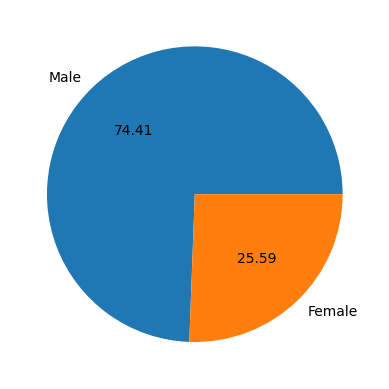

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct="%0.2f")
plt.show()

In [25]:
df['PlacedOrNot'].value_counts()

PlacedOrNot
1    659
0    478
Name: count, dtype: int64

In [26]:
#df['Stream'].describe()

In [27]:
df[['Internships','CGPA','Backlogs']].describe()

,Internships,CGPA,Backlogs
count,1137.000000,1137.000000,1137.000000
mean,0.851363,6.988566,0.296394
std,0.831743,1.067630,0.456868
min,0.000000,5.000000,0.000000
25%,0.000000,6.000000,0.000000
50%,1.000000,7.000000,0.000000
75%,1.000000,8.000000,1.000000
max,3.000000,9.000000,1.000000


In [28]:
df[df['PlacedOrNot']==0][['Internships','CGPA','Backlogs']].describe()

,Internships,CGPA,Backlogs
count,478.000000,478.000000,478.000000
mean,0.690377,6.320084,0.326360
std,0.727097,0.718178,0.469372
min,0.000000,5.000000,0.000000
25%,0.000000,6.000000,0.000000
50%,1.000000,6.000000,0.000000
75%,1.000000,7.000000,1.000000
max,3.000000,7.000000,1.000000


In [29]:
df[df['PlacedOrNot']==1][['Internships','CGPA','Backlogs']].describe()

,Internships,CGPA,Backlogs
count,659.000000,659.000000,659.000000
mean,0.968134,7.473445,0.274659
std,0.882393,1.016793,0.446681
min,0.000000,5.000000,0.000000
25%,0.000000,7.000000,0.000000
50%,1.000000,8.000000,0.000000
75%,2.000000,8.000000,1.000000
max,3.000000,9.000000,1.000000


In [30]:
import seaborn as sns

<Axes: xlabel='Internships', ylabel='Count'>

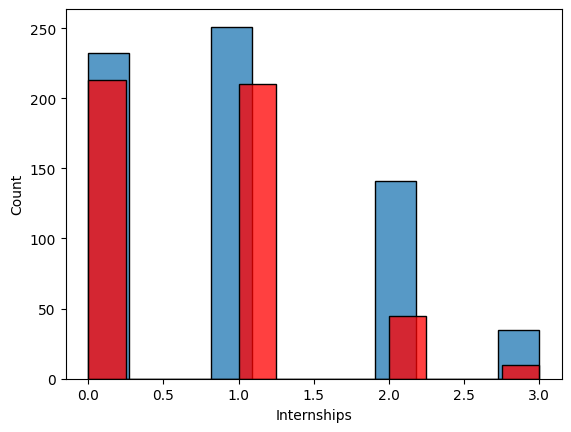

In [31]:
sns.histplot(df[df['PlacedOrNot']==1]['Internships'])
sns.histplot(df[df['PlacedOrNot']==0]['Internships'],color='red')

<Axes: xlabel='CGPA', ylabel='Count'>

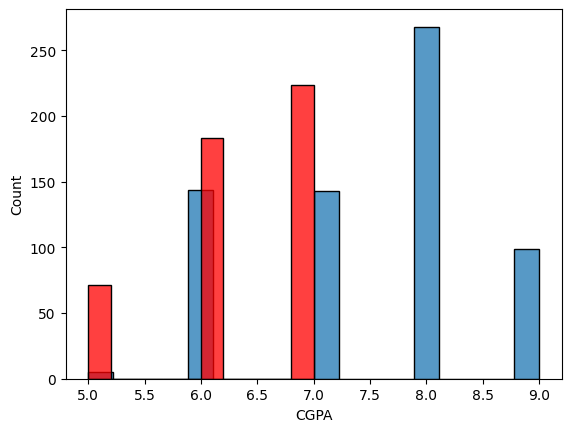

In [32]:
sns.histplot(df[df['PlacedOrNot']==1]['CGPA'])
sns.histplot(df[df['PlacedOrNot']==0]['CGPA'],color='red')

<Axes: xlabel='Backlogs', ylabel='Count'>

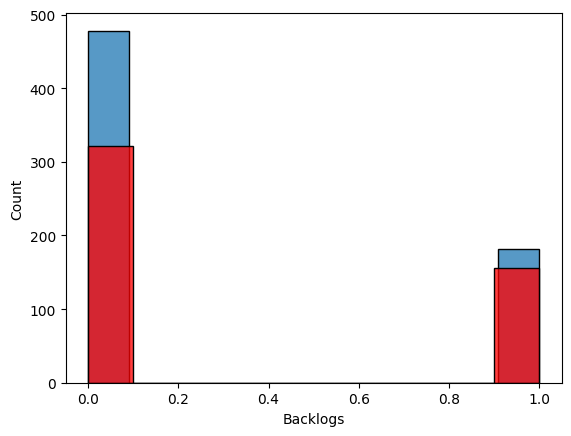

In [33]:
sns.histplot(df[df['PlacedOrNot']==1]['Backlogs'])
sns.histplot(df[df['PlacedOrNot']==0]['Backlogs'],color='red')

In [34]:
correlation_matrix = df.corr()

In [35]:
sns.set(rc={'figure.figsize': (8, 6)})

<Axes: >

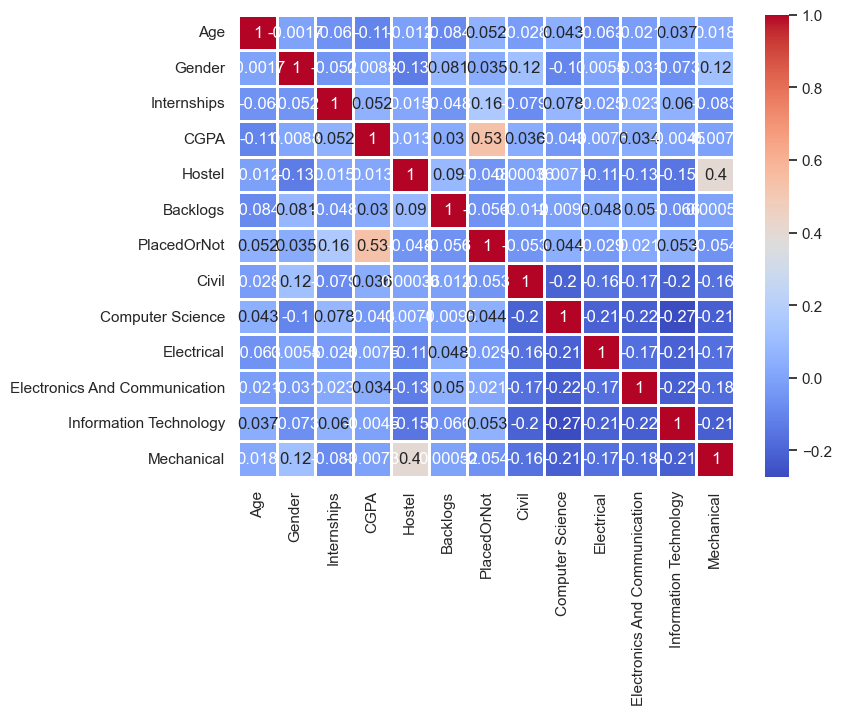

In [36]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)

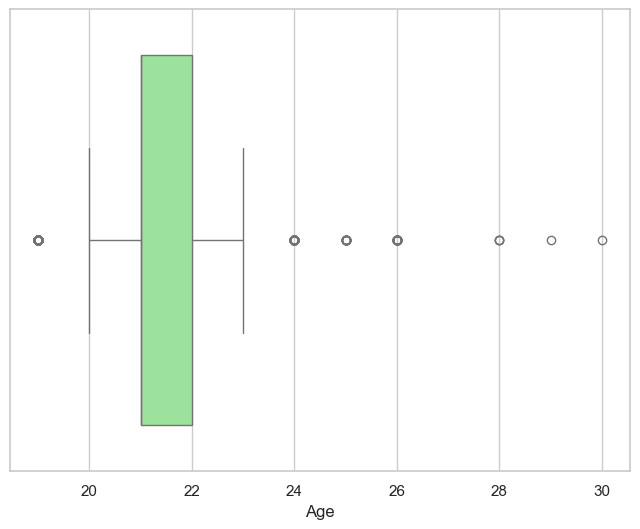

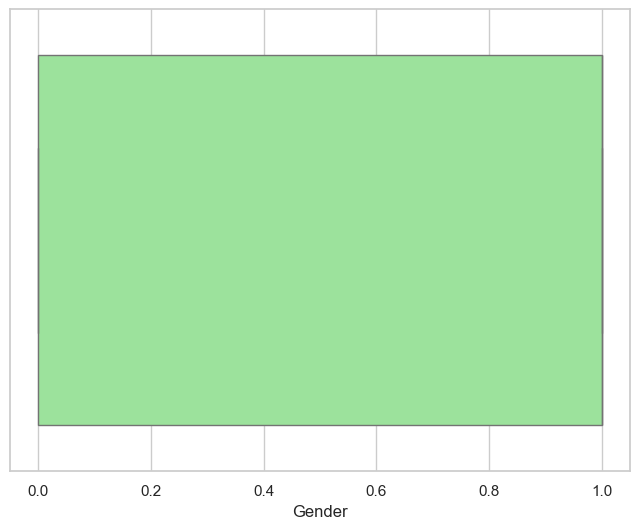

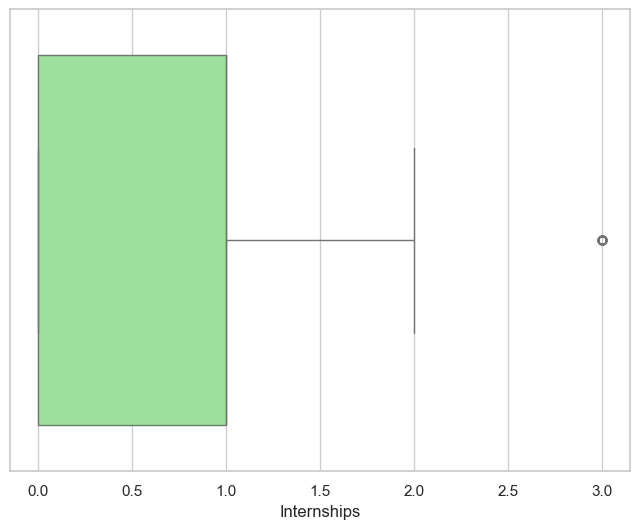

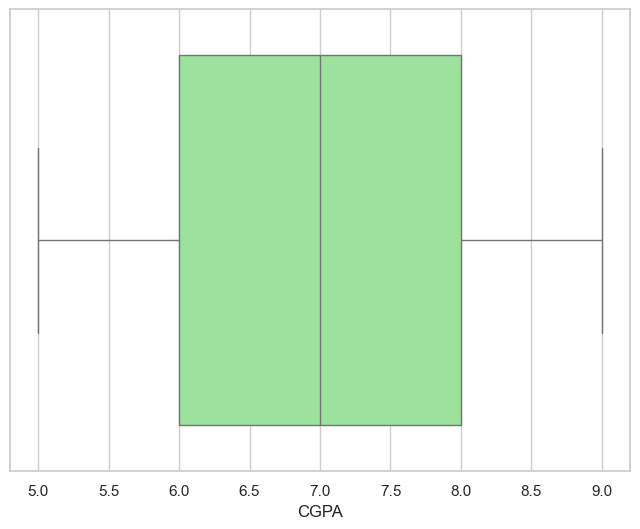

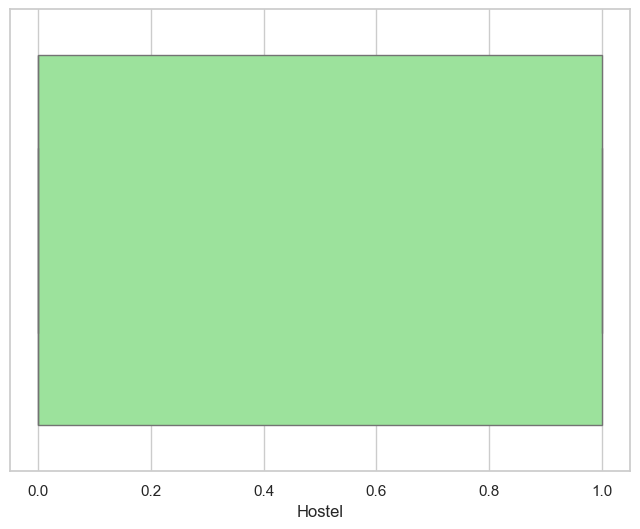

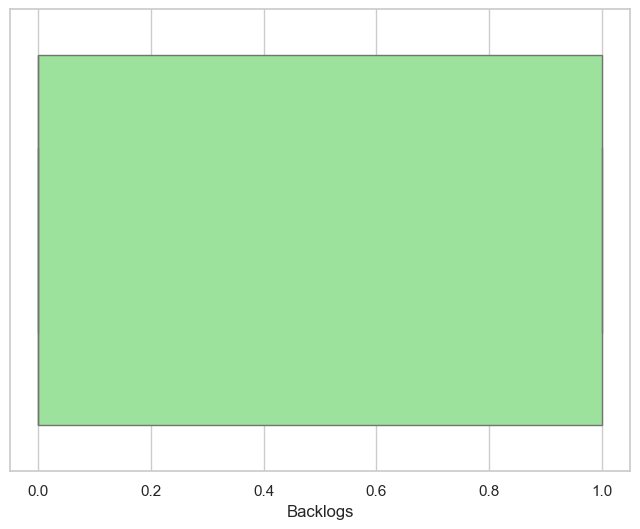

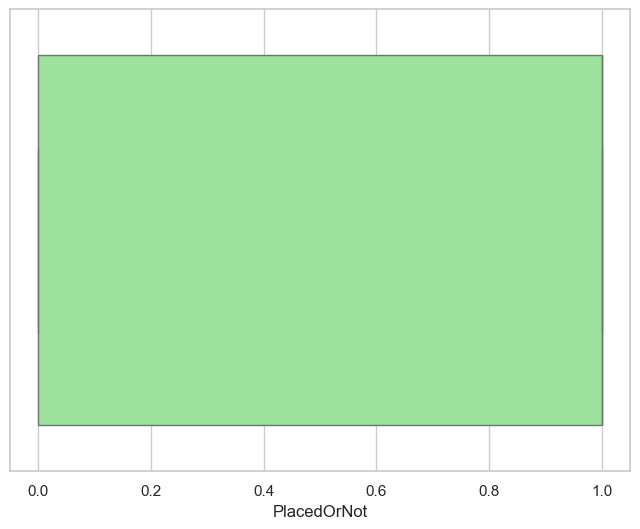

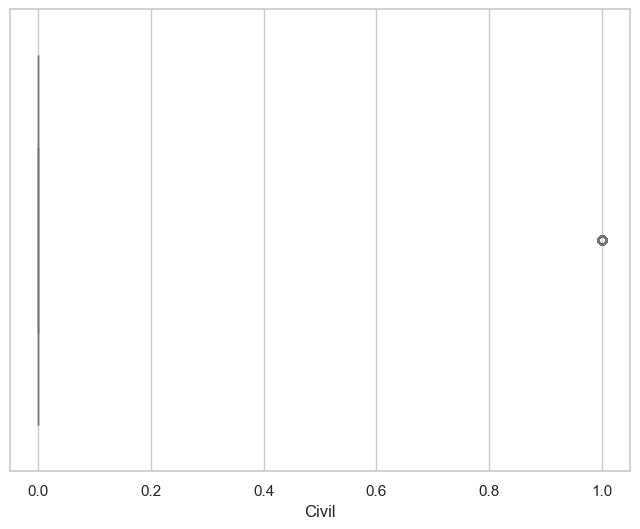

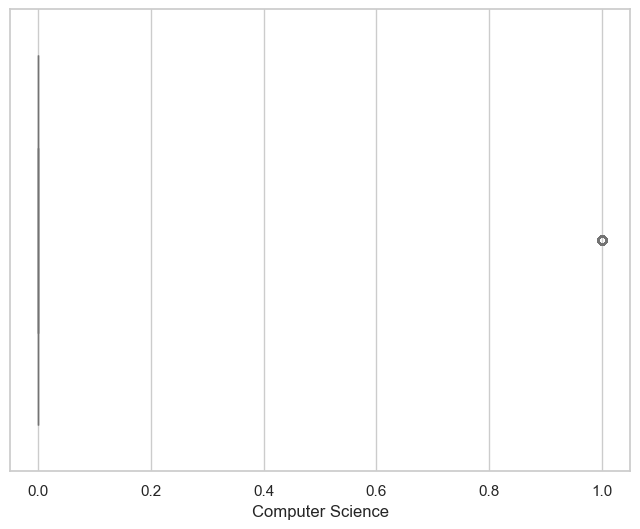

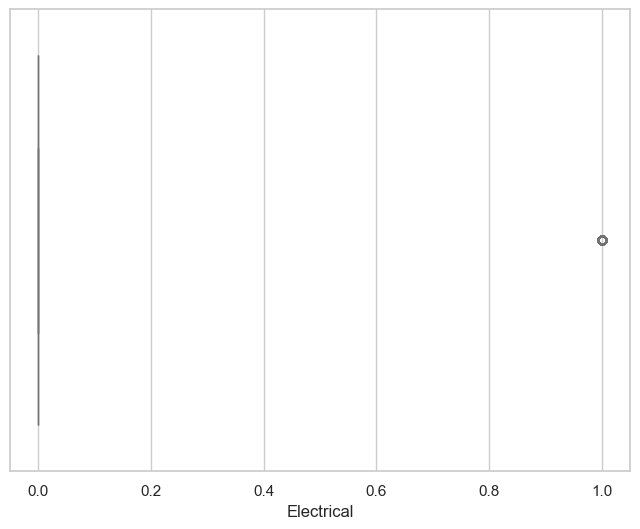

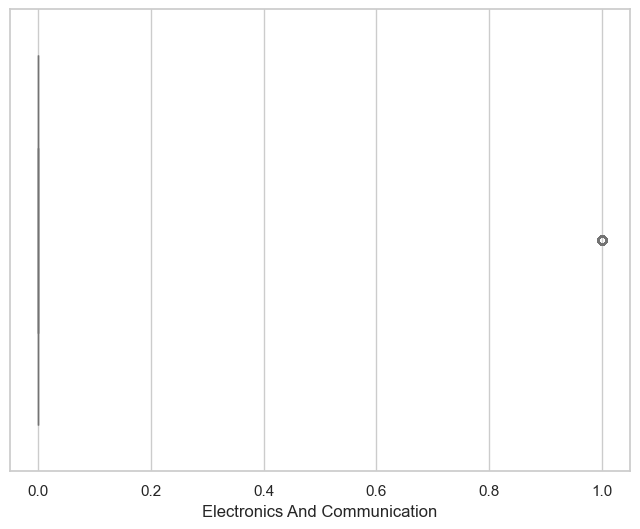

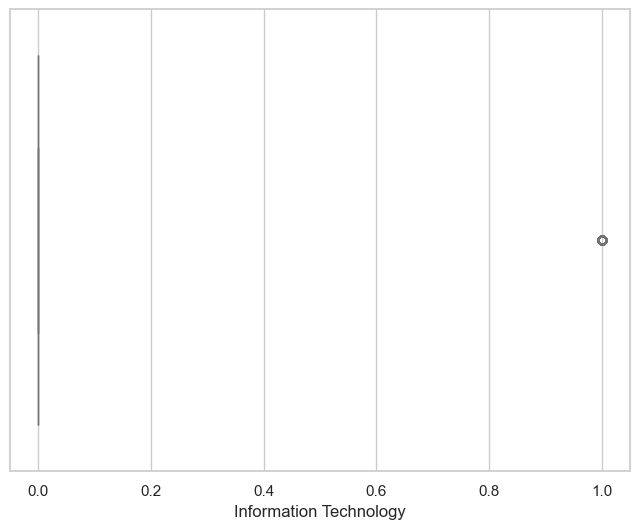

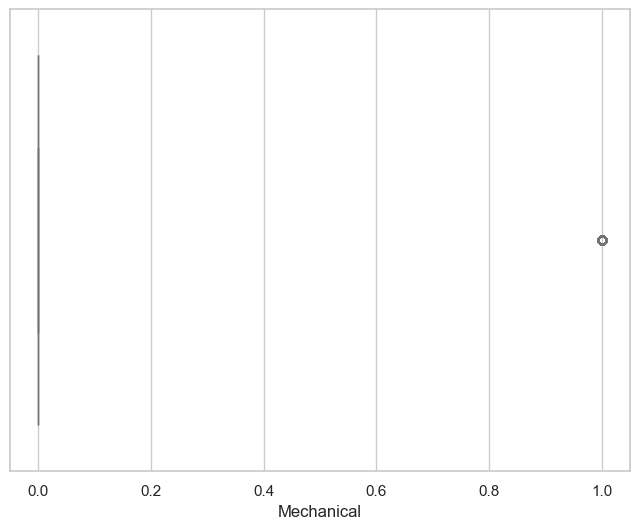

In [58]:
#outliers
sns.set(style="whitegrid", palette="pastel")
for col in df:
    sns.boxplot(x=df[col],color = "lightgreen")
    plt.show()

In [59]:
for col in df:    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)

print(df[outliers])

      Age  Gender  Internships  CGPA  Hostel  Backlogs  PlacedOrNot  Civil  \
4      22       1            0     8       1         0            1      0   
30     22       1            1     8       1         0            1      0   
65     22       1            0     9       0         0            1      0   
69     21       1            0     8       1         1            1      0   
76     21       1            0     9       1         0            1      0   
...   ...     ...          ...   ...     ...       ...          ...    ...   
2854   23       0            1     7       0         0            0      0   
2876   23       1            0     8       1         1            1      0   
2937   23       1            0     6       0         0            0      0   
2952   23       1            0     8       1         0            1      0   
2960   23       1            1     7       1         0            0      0   

      Computer Science  Electrical  Electronics And Communicati

In [38]:
#Feature slection using pearson correlation

In [39]:
#To avoid overfitting split the datset into training and testing datas then we find correlation among attribiutes in training set and remove highly correlated attributes from both training and testing datas

In [40]:
x=df.drop("PlacedOrNot",axis=1)
y=df["PlacedOrNot"]

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((909, 12), (228, 12))

In [42]:
cor=x_train.corr()

In [43]:
#Function to find correlated attributes above a certian threshold
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range (i):
      if corr_matrix.iloc[i,j]>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [44]:
corr_features=correlation(x_train,0.8)
len(set(corr_features))

0

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

In [46]:
#LOGISTIC REGRESSION
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

C:\Users\prita\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:

# Make predictions on the test set
y_pred = model.predict(x_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


Precision: 0.7259
Recall: 0.7778
F1 Score: 0.7510


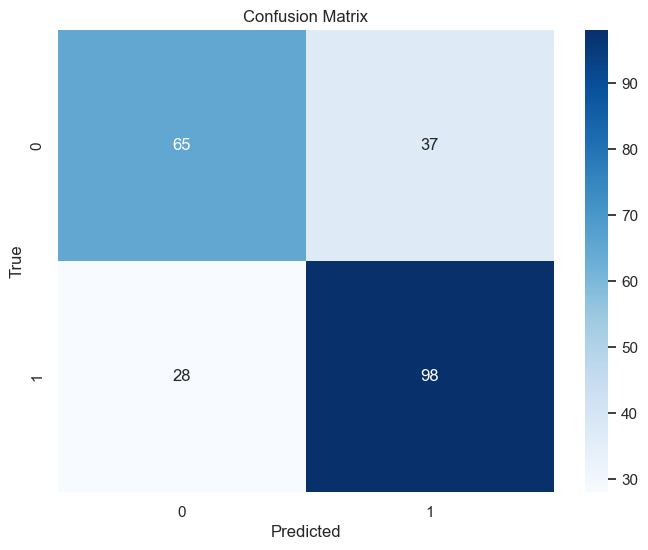

<Figure size 1000x800 with 0 Axes>

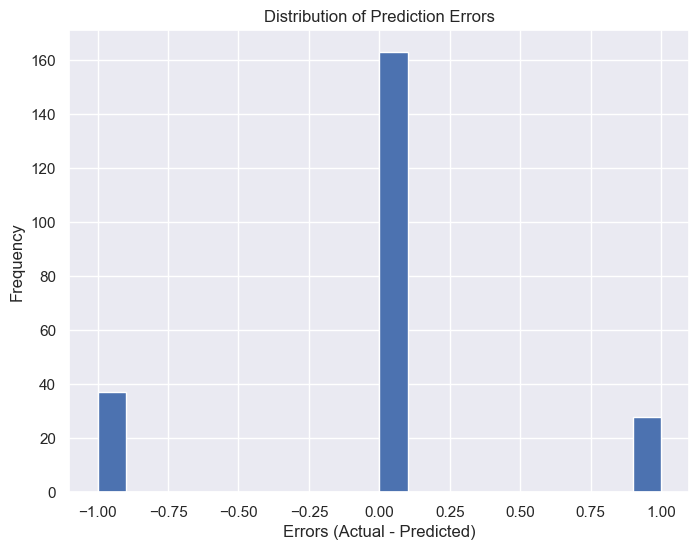

In [49]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.figure(figsize=(10,8))
plt.show()

errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.xlabel('Errors (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

Accuracy: 0.74
Precision: 0.7391
Recall: 0.8095
F1 Score: 0.7727


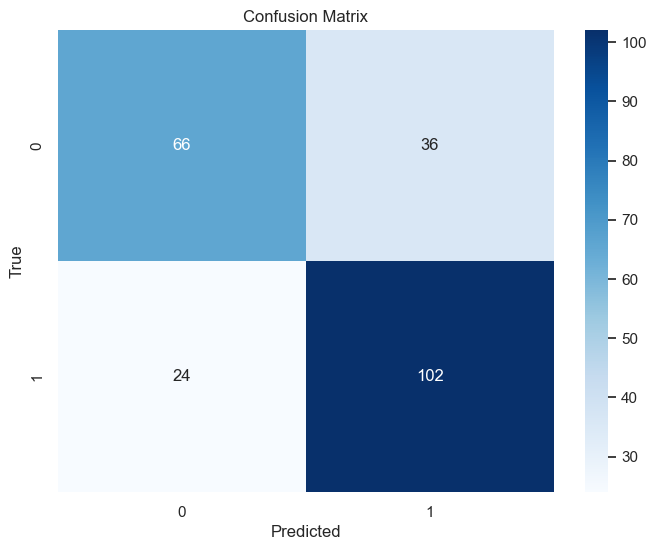

<Figure size 1000x800 with 0 Axes>

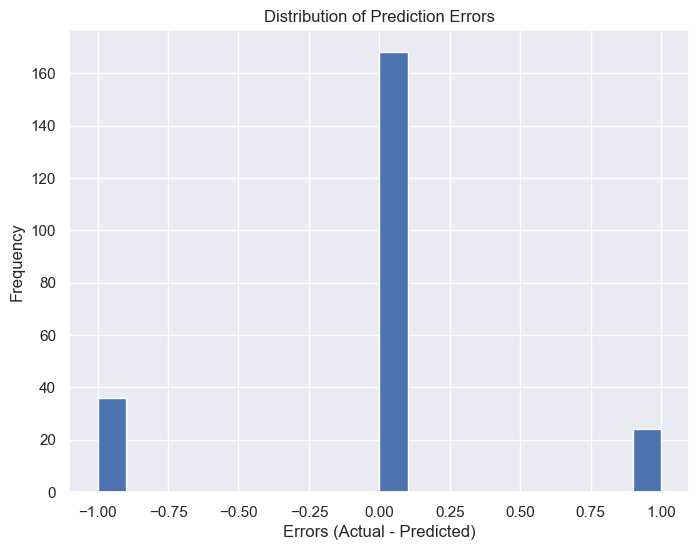

In [50]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.figure(figsize=(10,8))
plt.show()

errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.xlabel('Errors (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

Accuracy: 0.73
Precision: 0.7319
Recall: 0.8016
F1 Score: 0.7652


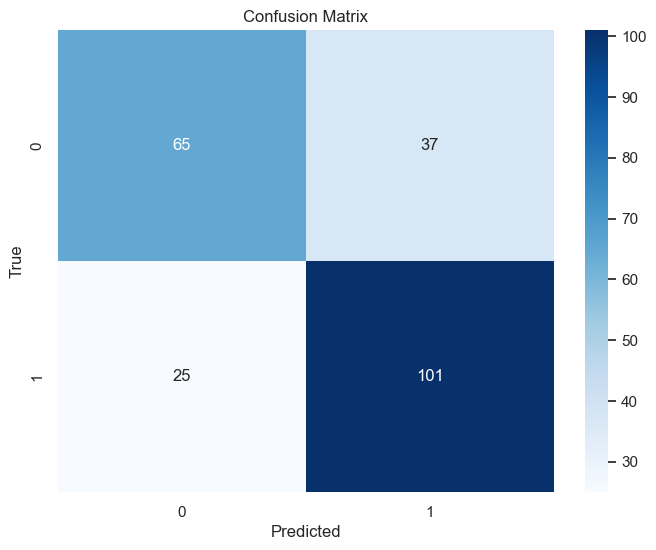

<Figure size 1000x800 with 0 Axes>

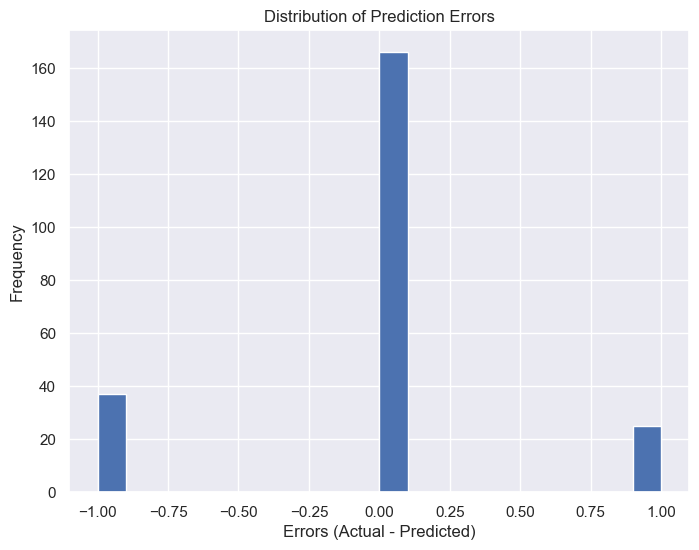

In [51]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.figure(figsize=(10,8))
plt.show()

errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.xlabel('Errors (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

In [52]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.83
Precision: 0.9151
Recall: 0.7698
F1 Score: 0.8362


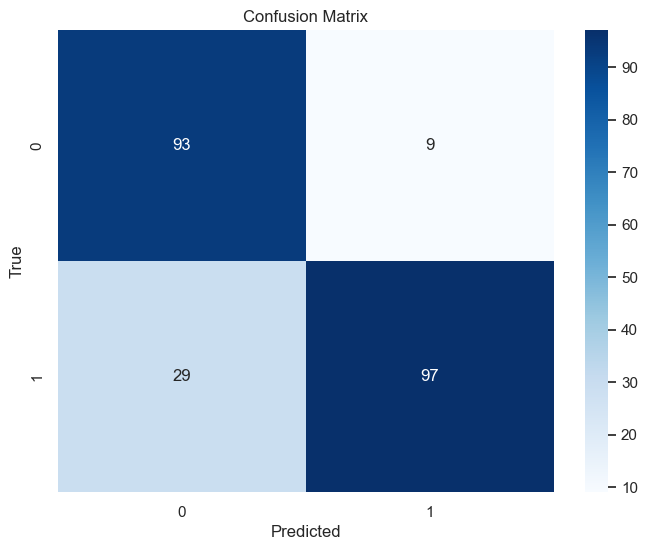

<Figure size 1000x800 with 0 Axes>

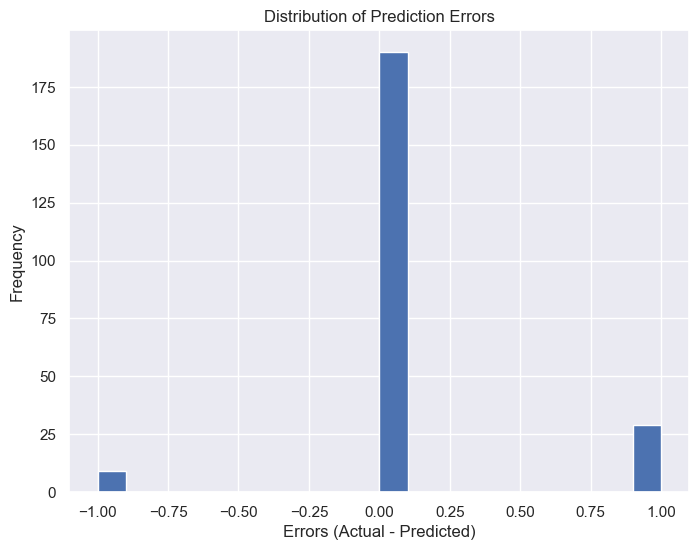

In [53]:
dt_model = DecisionTreeClassifier(max_depth=5)  # You can adjust the maximum depth of the tree

# Train the model
dt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.figure(figsize=(10,8))
plt.show()

errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.xlabel('Errors (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

In [54]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.74
Precision: 0.7519
Recall: 0.7937
F1 Score: 0.7722


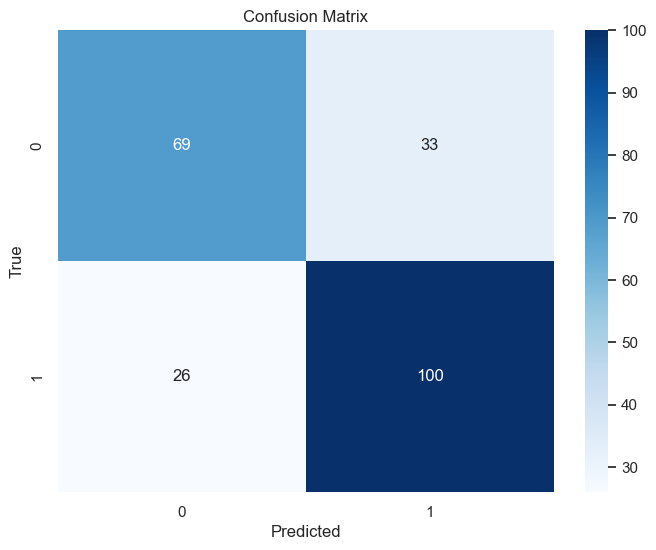

<Figure size 1000x800 with 0 Axes>

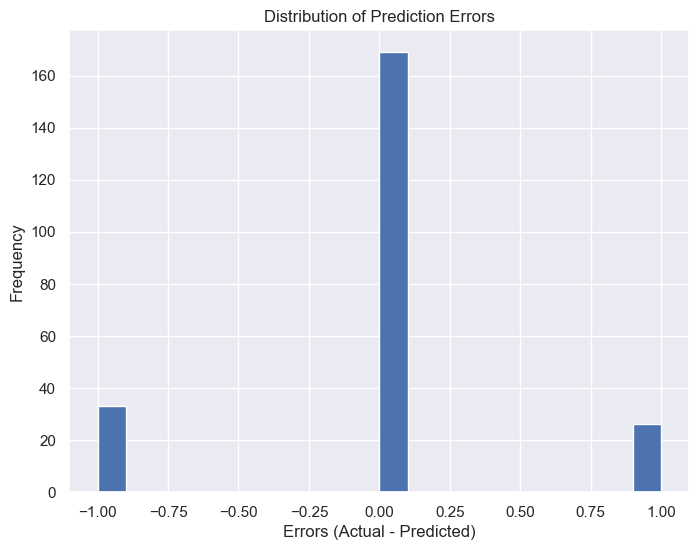

In [55]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)  # You can adjust the number of trees (n_estimators)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.figure(figsize=(10,8))
plt.show()

errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.xlabel('Errors (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

In [56]:
#SVM LINEAR
from sklearn.svm import SVC

Accuracy: 0.73
Precision: 0.7519
Recall: 0.7698
F1 Score: 0.7608


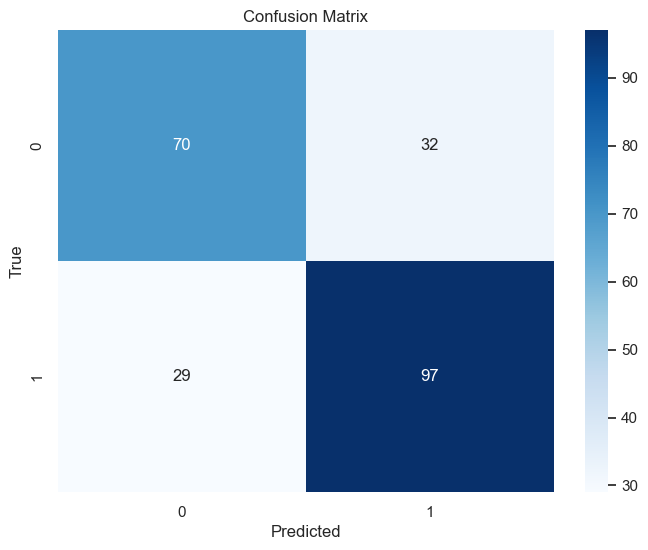

<Figure size 1000x800 with 0 Axes>

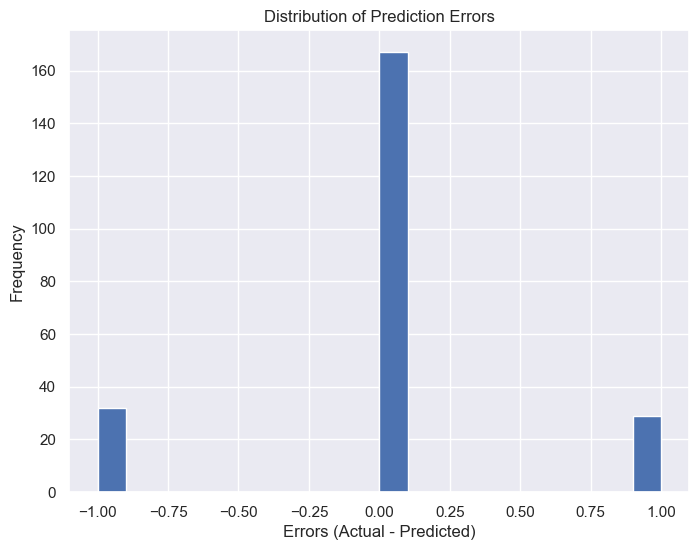

In [57]:
svm_model = SVC(kernel='linear', C=1.0)  # You can adjust the regularization parameter C

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.figure(figsize=(10,8))
plt.show()

errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.xlabel('Errors (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()